# Pregunta
## ¿Qué aseguradora ofrece las primas más bajas para solteros en cada estado?

Por: Julio Esteban Berdúo Aragón

   State                                             Issuer
0     AK                                        Moda Health
1     AL                                       Humana, Inc.
2     AR                Arkansas Blue Cross and Blue Shield
3     AZ  University of Arizona Health Plans - Universit...
4     DE                                              Aetna
5     FL                                              Aetna
6     GA              Ambetter from Peach State Health Plan
7     IA                  Coventry Health Care of Iowa Inc.
8     IL                                  IlliniCare Health
9     IN                  Anthem Blue Cross and Blue Shield
10    KS        BlueCross BlueShield Kansas Solutions, Inc.
11    LA                                       Humana, Inc.
12    ME                     Maine Community Health Options
13    MI                                       Humana, Inc.
14    MO                                       Humana, Inc.
15    MS                      Ambetter f

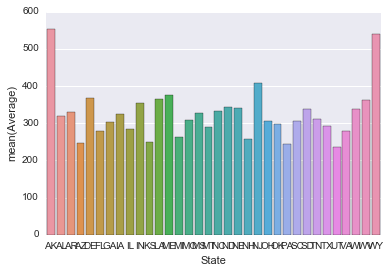

In [3]:
from __future__ import division
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

seguros = pd.read_csv('seguros.csv')
s = ['State','Issuer_name','Premium_adult_Age21','Premium_adult_Age27','Premium_adult_Age30 ','Premium_adult_Age40 ','Premium_adult_Age50 ','Premium_adult_Age60 ']
s2 = ['Premium_adult_Age21','Premium_adult_Age27','Premium_adult_Age30 ','Premium_adult_Age40 ','Premium_adult_Age50 ','Premium_adult_Age60 ']
seg = seguros[s]
segsprom = seg.groupby(['State','Issuer_name'],as_index=False).mean()
seg2 = seg.groupby('State',as_index=False).mean()
states = seg2['State']

def get_min_issuer(df,state,columns):
    df1 = df[df['State'] == state]
    df1 = df1.reset_index(int,0)
    summ = []
    promm = []
    for h in range(0,df1.State.count()):
        summ.append(0)
        promm.append(0)
        for i in columns:
            summ[h]+=df1[i][h]
        promm[h]=summ[h]/len(columns)
    maximum = min(promm)
    x = 0
    for i in range(0,len(promm)):
        if promm[i]==maximum:
            x = i
    t = [df1['Issuer_name'][x],promm[x]]
    return t

def get_df(data,state,columns):
    l = []
    m = []
    for i in states:
        d = get_min_issuer(data,i,columns)
        l.append(d[0])
        m.append(d[1])
    ser1 = pd.Series(state)
    ser2 = pd.Series(l)
    ser3 = pd.Series(m)
    df2 = pd.concat([ser1,ser2,ser3],axis=1)
    df2.columns = ['State','Issuer','Average']
    return df2

df3 = get_df(segsprom,states,s2)
df5 = df3[['State','Issuer']]
print df5
crosstab = pd.crosstab(seg['Issuer_name'], seg['State'])
print crosstab
pd.crosstab(df3.Issuer,df3.State)
sns.barplot(df3.State,df3.Average)
minimum = min(df3.Average)
df4 = df3[df3.Average == minimum]
print 'Aseguradora más económica: '+ str(df4.Issuer)
print 'Estado: '+ str(df4.State)